[Natural Language Processing with Disaster tweets Kaggle](https://www.kaggle.com/c/nlp-getting-started/overview)

Based on twitter data, finding if the real disaster is happeing or not.
- 1 -> yes, disaster is happening
- 0 -> No, there is no disaster but the text contains disaster words.

In [1]:
%load_ext watermark
%load_ext lab_black

In [2]:
#%watermark

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.style.use("ggplot")

import warnings

warnings.filterwarnings("ignore")

In [4]:
# plt.style.available

In [5]:
%watermark -a "Sudarshan Koirala"-iv -v

Author: Sudarshan Koirala

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.23.1

seaborn   : 0.11.1
pandas    : 1.2.4
matplotlib: 3.4.2



#### Loading dataset

In [6]:
# read the dataset
dataset = pd.read_csv("nlp-tweet-data/train.csv")
dataset.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
dataset.shape

(7613, 5)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


We don't work here with `keywork` and `location` here so no need of any pre-processing as we see some values are missing.

#### Exploratory Data Analysis

In [9]:
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.dpi"] = 80

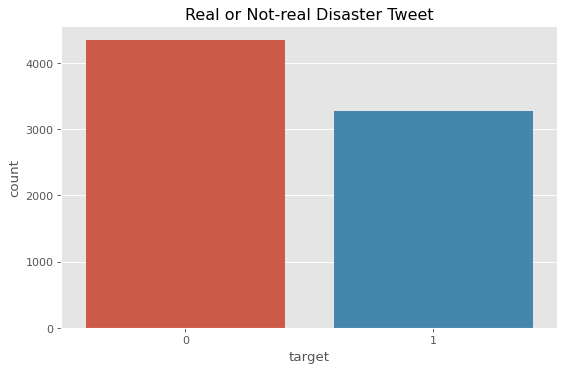

In [10]:
# target class distribution
sns.countplot("target", data=dataset)
plt.title("Real or Not-real Disaster Tweet")
plt.show()

In [11]:
# see the value counts
dataset["target"].value_counts(ascending=True)

1    3271
0    4342
Name: target, dtype: int64

<AxesSubplot:ylabel='target'>

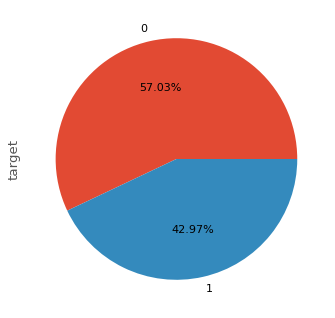

In [12]:
dataset["target"].value_counts().plot.pie(autopct="%1.2f%%")

#### Data cleaning

In [14]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [15]:
stop_words = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

In [17]:
dataset.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [18]:
dataset["text"]

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [19]:
def clean_text(tweet_text):
    tweet_text = re.sub(r'https\S+', '', tweet_text)                      # Removing url
    tweet_text = re.sub('[^a-zA-Z]', ' ', tweet_text)                     # Removing numbers and punctuations
    tweet_text = str(tweet_text).lower()                                  # Convert all characters to lowercase
    tweet_text = word_tokenize(tweet_text)                                # Tokenization
    tweet_text = [item for item in tweet_text if item not in stop_words]  # Removing the stop words
    tweet_text = [lemma.lemmatize(word=w, pos='v') for w in tweet_text]   # Lemmatization
    tweet_text = [i for i in tweet_text if len(i) > 2]                    # Removing the words having lenght <= 2
    tweet_text = ' '.join(tweet_text)                                     # Converting list to string
    return tweet_text

In [20]:
dataset["cleandText"] = dataset["text"].apply(clean_text)

In [21]:
dataset

,id,keyword,location,text,target,cleandText
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deeds reason earthquake may allah forgive
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,residents ask shelter place notify officer eva...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation order cali...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,get send photo ruby alaska smoke wildfires pou...
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,two giant crane hold bridge collapse nearby ho...
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,aria ahrary thetawniest control wild fire cali...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,utc volcano hawaii http zdtoyd ebj
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,police investigate bike collide car little por...


In [ ]:
real = " ".join(dataset["cleandText"])
#real